In [1]:
!pip install -q gdown

import os, gdown, warnings
warnings.filterwarnings("ignore")

FOLDER_ID = "1JvI5xhPfN3VmjpWYZk9fCHG41xG697um"   # folder yang berisi train_transaction.csv & test_transaction.csv
BASE_PATH = "midterm_fraud_small"

os.makedirs(BASE_PATH, exist_ok=True)

gdown.download_folder(
    id=FOLDER_ID,
    output=BASE_PATH,
    quiet=False
)


Retrieving folder contents


Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=b4bb256b-8ef4-4dce-a50b-4d6eaabfa843
To: /content/midterm_fraud_small/test_transaction.csv
100%|██████████| 613M/613M [00:08<00:00, 69.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=66e21116-b6ca-44ed-97c8-8ddb97a57f44
To: /content/midterm_fraud_small/train_transaction.csv
100%|██████████| 683M/683M [00:06<00:00, 107MB/s] 
Download completed


['midterm_fraud_small/test_transaction.csv',
 'midterm_fraud_small/train_transaction.csv']

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_path = os.path.join(BASE_PATH, "train_transaction.csv")
test_path  = os.path.join(BASE_PATH, "test_transaction.csv")

train_df_full = pd.read_csv(train_path)
test_df       = pd.read_csv(test_path)

print("Train full shape:", train_df_full.shape)
print("Test  shape     :", test_df.shape)

train_df_full.head()


Train full shape: (590540, 394)
Test  shape     : (506691, 393)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df_full.head() #isFraud adalah target featurenya

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_df.head() #uji data baru, setelah pembuatan model machine learningnya

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# gunakan hanya sebagian data train agar RAM aman
MAX_ROWS_TRAIN = 200_000  # bisa diturunkan kalau masih berat

if len(train_df_full) > MAX_ROWS_TRAIN:
    train_df = train_df_full.sample(MAX_ROWS_TRAIN, random_state=42)
else:
    train_df = train_df_full.copy()

print("Train shape setelah sampling:", train_df.shape)


Train shape setelah sampling: (200000, 394)


In [13]:
target_col = "isFraud"

# semua kolom numerik
numeric_cols_all = train_df.select_dtypes(include=[np.number]).columns.tolist()

# buang kolom yang bukan fitur
for col in [target_col, "TransactionID", "TransactionDT"]:
    if col in numeric_cols_all:
        numeric_cols_all.remove(col)

# ambil hanya N fitur pertama agar dimensi kecil
MAX_FEATURES = 50
numeric_cols = numeric_cols_all[:MAX_FEATURES]

print("Jumlah fitur numerik yang dipakai:", len(numeric_cols))
print("Contoh kolom:", numeric_cols[:10])


Jumlah fitur numerik yang dipakai: 50
Contoh kolom: ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1']


In [14]:
X = train_df[numeric_cols]
y = train_df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("X_train:", X_train.shape, " X_val:", X_val.shape)
print("Distribusi y_train:")
print(y_train.value_counts(normalize=True))


X_train: (160000, 50)  X_val: (40000, 50)
Distribusi y_train:
isFraud
0    0.964506
1    0.035494
Name: proportion, dtype: float64


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create a preprocessing pipeline that first imputes NaNs, then scales the data
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply the preprocessing pipeline to the data splits
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled   = preprocessor.transform(X_val)
X_test_scaled  = preprocessor.transform(test_df[numeric_cols])

# Convert to float32 for Deep Learning models
X_train_scaled32 = X_train_scaled.astype("float32")
X_val_scaled32   = X_val_scaled.astype("float32")
X_test_scaled32  = X_test_scaled.astype("float32")

print(f"X_train_scaled32 shape: {X_train_scaled32.shape}")
print(f"X_val_scaled32 shape: {X_val_scaled32.shape}")

# Diagnostic: Check for NaNs after preprocessing
print(f"NaNs in X_train_scaled32: {np.isnan(X_train_scaled32).sum()}")
print(f"NaNs in X_val_scaled32: {np.isnan(X_val_scaled32).sum()}")
print(f"NaNs in X_test_scaled32: {np.isnan(X_test_scaled32).sum()}")

# If any NaNs are still present, identify problematic columns
if np.isnan(X_train_scaled32).any() or np.isnan(X_val_scaled32).any() or np.isnan(X_test_scaled32).any():
    print("Warning: NaN values still exist after preprocessing. Identifying problematic columns...")
    nan_cols_train = X_train.columns[np.isnan(X_train).any()].tolist()
    nan_cols_val = X_val.columns[np.isnan(X_val).any()].tolist()
    nan_cols_test = test_df[numeric_cols].columns[np.isnan(test_df[numeric_cols]).any()].tolist()
    all_nan_cols = list(set(nan_cols_train + nan_cols_val + nan_cols_test))

    # Further check if these columns are entirely NaN in the original data
    all_nan_in_original_train = [col for col in all_nan_cols if train_df[col].isnull().all()]
    all_nan_in_original_test = [col for col in all_nan_cols if test_df[col].isnull().all()]

    if all_nan_in_original_train or all_nan_in_original_test:
        print("Columns with all NaN values that might be causing issues:")
        print(f"  In train_df: {all_nan_in_original_train}")
        print(f"  In test_df: {all_nan_in_original_test}")
        print("Consider dropping these columns or handling them specifically.")

X_train_scaled32 shape: (160000, 50)
X_val_scaled32 shape: (40000, 50)
NaNs in X_train_scaled32: 0
NaNs in X_val_scaled32: 0
NaNs in X_test_scaled32: 0


Validation AUC – Logistic Regression: 0.7858

Classification Report – Logistic Regression
              precision    recall  f1-score   support

           0     0.9848    0.7650    0.8611     38580
           1     0.0962    0.6796    0.1685      1420

    accuracy                         0.7619     40000
   macro avg     0.5405    0.7223    0.5148     40000
weighted avg     0.9533    0.7619    0.8365     40000



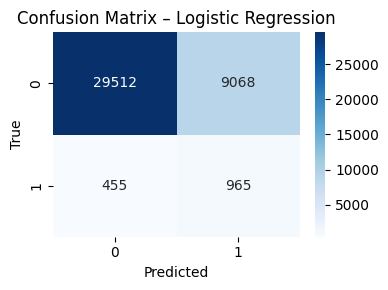

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

logreg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        max_iter=500,
        class_weight="balanced",
        n_jobs=-1,
        solver="lbfgs"
    ))
])

logreg.fit(X_train, y_train)

y_val_proba_lr = logreg.predict_proba(X_val)[:, 1]
y_val_pred_lr  = (y_val_proba_lr >= 0.5).astype(int)

auc_lr = roc_auc_score(y_val, y_val_proba_lr)
print(f"Validation AUC – Logistic Regression: {auc_lr:.4f}\n")

print("Classification Report – Logistic Regression")
print(classification_report(y_val, y_val_pred_lr, digits=4))

cm_lr = confusion_matrix(y_val, y_val_pred_lr)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Validation AUC – Random Forest: 0.8991

Classification Report – Random Forest
              precision    recall  f1-score   support

           0     0.9784    0.9984    0.9883     38580
           1     0.9049    0.4021    0.5568      1420

    accuracy                         0.9773     40000
   macro avg     0.9417    0.7003    0.7726     40000
weighted avg     0.9758    0.9773    0.9730     40000



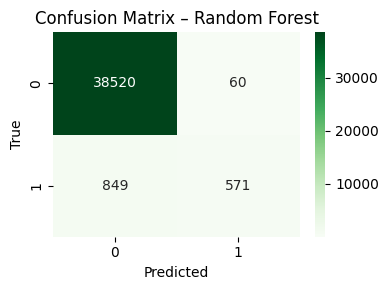

In [17]:
rf = RandomForestClassifier(
    n_estimators=100,         # sedikit saja
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_val_proba_rf = rf.predict_proba(X_val_scaled)[:, 1]
y_val_pred_rf  = (y_val_proba_rf >= 0.5).astype(int)

auc_rf = roc_auc_score(y_val, y_val_proba_rf)
print(f"Validation AUC – Random Forest: {auc_rf:.4f}\n")

print("Classification Report – Random Forest")
print(classification_report(y_val, y_val_pred_rf, digits=4))

cm_rf = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [18]:
print("=== Validation AUC (Machine Learning) ===")
print(f"Logistic Regression : {auc_lr:.4f}")
print(f"Random Forest       : {auc_rf:.4f}")


=== Validation AUC (Machine Learning) ===
Logistic Regression : 0.7858
Random Forest       : 0.8991


In [19]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
class_weight_dict


{np.int64(0): np.float64(0.5183999585280034),
 np.int64(1): np.float64(14.08698714562423)}

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)

input_dim = X_train_scaled32.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - auc: 0.6092 - loss: 0.6922 - val_auc: 0.7550 - val_loss: 0.6094
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7512 - loss: 0.5975 - val_auc: 0.7760 - val_loss: 0.5811
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7777 - loss: 0.5746 - val_auc: 0.7871 - val_loss: 0.5537
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7854 - loss: 0.5663 - val_auc: 0.7911 - val_loss: 0.5488
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7917 - loss: 0.5583 - val_auc: 0.7952 - val_loss: 0.5349
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7947 - loss: 0.5545 - val_auc: 0.7985 - val_loss: 0.5287
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.8016 - loss: 0.5461 - val_auc: 0.8014 - val_loss: 0.5282
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.8054 - loss: 0.5411 - val_auc: 0.8034 - val_loss: 0.5179
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.8070

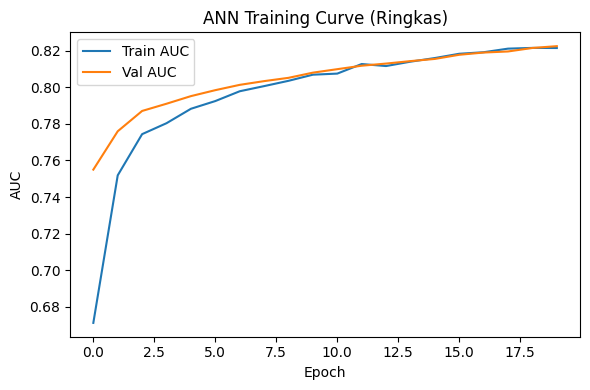

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor="val_auc",
    mode="max",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled32, y_train,
    validation_data=(X_val_scaled32, y_val),
    epochs=20,
    batch_size=2048,          # cukup kecil
    class_weight=class_weight_dict,
    callbacks=[es],
    verbose=1
)

plt.figure(figsize=(6,4))
plt.plot(history.history["auc"], label="Train AUC")
plt.plot(history.history["val_auc"], label="Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("ANN Training Curve (Ringkas)")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
y_val_proba_dl = model.predict(X_val_scaled32).ravel()
y_val_pred_dl  = (y_val_proba_dl >= 0.5).astype(int)

auc_dl = roc_auc_score(y_val, y_val_proba_dl)
print(f"Validation AUC – Deep Learning (ANN): {auc_dl:.4f}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Validation AUC – Deep Learning (ANN): 0.8226


In [23]:
test_proba_dl = model.predict(X_test_scaled32).ravel()

submission = pd.DataFrame({
    "TransactionID": test_df["TransactionID"],
    "isFraud": test_proba_dl
})

submission.head()

submission.to_csv("submission_fraud_extreme_small_ann.csv", index=False)
print("File submission_fraud_extreme_small_ann.csv tersimpan.")


15835/15835 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
File submission_fraud_extreme_small_ann.csv tersimpan.
